In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, OPTICS, BisectingKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics, cluster
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
num_students=5000

np.random.seed(42) # for reproducibility
data = []

    # Group 1: Fast Responders / High Achievers
for _ in range(num_students // 3):
    data.append({
        'reading_speed_wpm': np.random.normal(loc=250, scale=30),
        'video_watch_time_pct': np.random.uniform(0.4, 0.8),
        'quiz_response_time_sec': np.random.normal(loc=30, scale=10),
        'quiz_score_pct': np.random.normal(loc=90, scale=5),
        'time_on_platform_hrs': np.random.normal(loc=8, scale=2),
        'learning_style' : 'Fast Respondents'
    })
    
        # Group 2: Slow Learners / Methodical
for _ in range(num_students // 3):
    data.append({
        'reading_speed_wpm': np.random.normal(loc=120, scale=20),
        'video_watch_time_pct': np.random.uniform(0.6, 0.9),
        'quiz_response_time_sec': np.random.normal(loc=100, scale=20),
        'quiz_score_pct': np.random.normal(loc=75, scale=10),
        'time_on_platform_hrs': np.random.normal(loc=12, scale=3),
        'learning_style' : 'Slow Learners'
    })
        
        # Group 3: Visual Learners / Average Pace
for _ in range(num_students - 2 * (num_students // 3)):
    data.append({
        'reading_speed_wpm': np.random.normal(loc=180, scale=25),
        'video_watch_time_pct': np.random.normal(loc=0.9, scale=0.05),
        'quiz_response_time_sec': np.random.normal(loc=60, scale=15),
        'quiz_score_pct': np.random.normal(loc=80, scale=8),
        'time_on_platform_hrs': np.random.normal(loc=10, scale=2.5),
        'learning_style' : 'Visual Learners'
})
df = pd.DataFrame(data)
# df['Student_ID'] = [i for i in range(1,num_students+1)]

df.to_csv('student_response.csv',index=False)


In [24]:
response=pd.read_csv('student_response.csv')
response

,reading_speed_wpm,video_watch_time_pct,quiz_response_time_sec,quiz_score_pct,time_on_platform_hrs,learning_style
0,264.901425,0.692798,28.617357,84.440599,8.637804,Fast Respondents
1,258.371239,0.683229,40.105153,87.652628,9.085120,Fast Respondents
2,236.097469,0.521697,25.342702,76.937255,9.900739,Fast Respondents
3,274.493352,0.455798,14.761240,85.459880,5.175393,Fast Respondents
4,293.969463,0.479870,27.742237,102.797440,8.788466,Fast Respondents
...,...,...,...,...,...,...
4995,177.123230,1.043355,65.682768,81.177135,11.073978,Visual Learners
4996,168.967025,0.946474,65.415029,82.521374,8.439699,Visual Learners
4997,140.891742,0.874931,64.239508,76.442404,10.729318,Visual Learners
4998,174.190953,0.921529,45.347638,81.543120,8.397615,Visual Learners


In [15]:
X= response.drop(columns='learning_style')
y= response['learning_style']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 4000
Testing set size: 1000


In [123]:
# Clustering with kmeans 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_train= kmeans.fit_predict(X_train)
silhouette_kmean= silhouette_score(X_train, kmeans_train)
print(f"Silhouette Score : {silhouette_kmean:.4f}")

Silhouette Score : 0.4890


In [137]:
db_index = davies_bouldin_score(X_train, kmeans_train)
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.6911107902678362


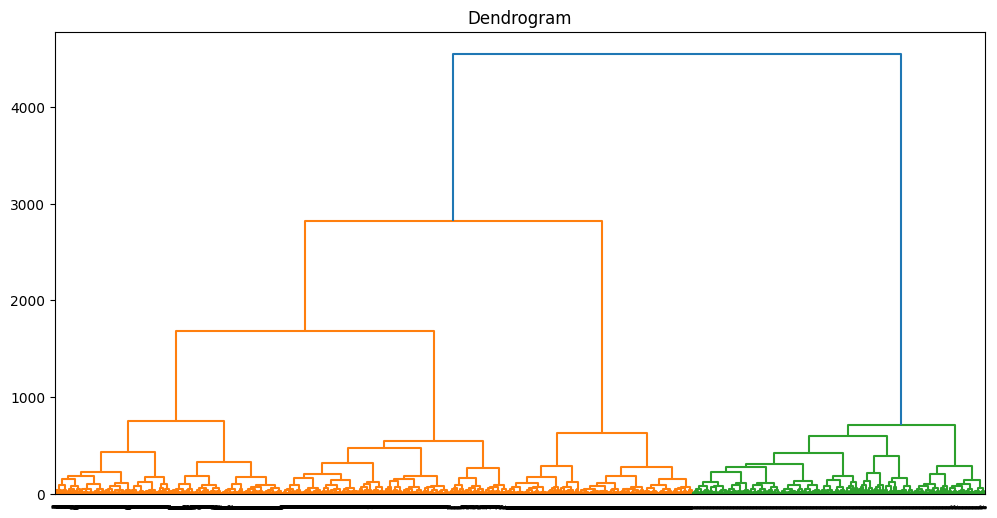

In [128]:
linkage_matrix = linkage(X_train, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, orientation='top', labels=kmeans_train, distance_sort='descending')
plt.title('Dendrogram')
plt.show()

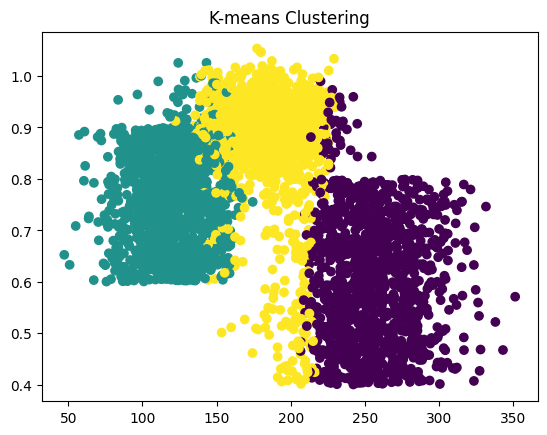

In [31]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=kmeans_train, cmap='viridis')
plt.title('K-means Clustering')
plt.show()

In [136]:
# Creating clusters with DBSCAN method
dbscan= DBSCAN(eps=0.5, min_samples=1)
dbscan_train= dbscan.fit_predict(X_train)
silhouette_dbscan= silhouette_score(X_train, dbscan_train)
print(f"Silhouette Score : {silhouette_dbscan:.4f}")
db_index = davies_bouldin_score(X_train, dbscan_train)
print(f'Davies-Bouldin Index: {db_index}')

Silhouette Score : 0.0007
Davies-Bouldin Index: 0.006567052218585698


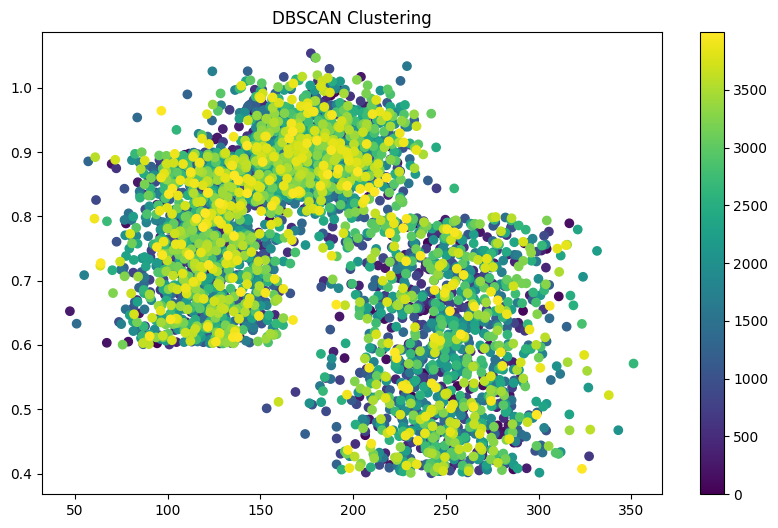

In [135]:
plt.figure(figsize=(10, 6))
scatter=plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=dbscan_train, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clustering')
plt.show()

In [138]:
af = AffinityPropagation(preference=-50, random_state=0)
af_train=af.fit_predict(X_train)
silhouette_af= silhouette_score(X_train, af_train)
print(f"Silhouette Score : {silhouette_af:.4f}")
db_index = davies_bouldin_score(X_train, af_train)
print(f'Davies-Bouldin Index: {db_index}')

c:\Users\simra\OneDrive\Documents\Final_Project\.venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Silhouette Score : 0.2284
Davies-Bouldin Index: 0.7905859425252194


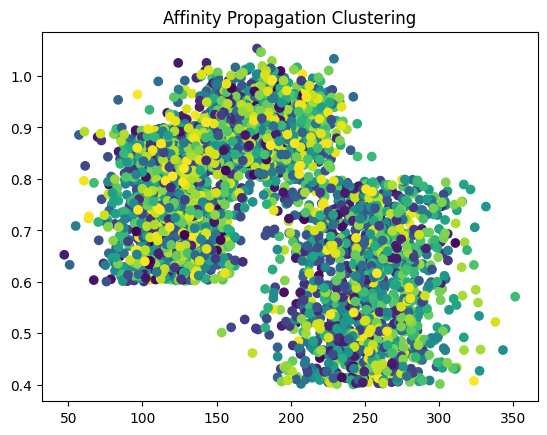

In [67]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=af_train, cmap='viridis')
plt.title('Affinity Propagation Clustering')
plt.show()

In [139]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
bd=ms.fit_predict(X_train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
silhouette_af= silhouette_score(X_train,bd)
print(f"Silhouette Score : {silhouette_af:.4f}")
db_index = davies_bouldin_score(X_train, bd)
print(f'Davies-Bouldin Index: {db_index}')

number of estimated clusters : 3
Silhouette Score : 0.4870
Davies-Bouldin Index: 0.697072036674088


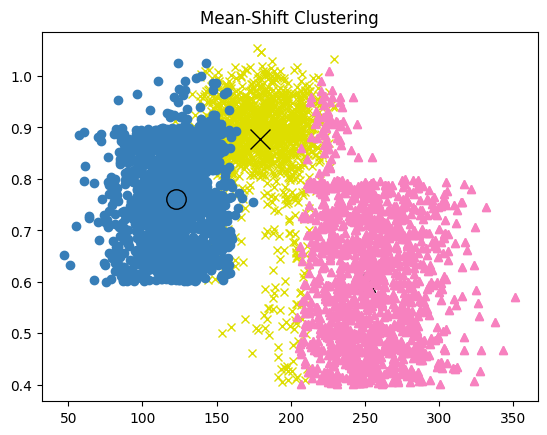

In [80]:
colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(
        X_train.loc[my_members, X_train.columns[0]], 
        X_train.loc[my_members, X_train.columns[1]], 
        markers[k], 
        color=col
    )
    plt.plot(
        cluster_center[0], 
        cluster_center[1], 
        markers[k],
        markerfacecolor=col,
        markeredgecolor='k',
        markersize=14
    )
plt.plot(X_train.loc[my_members, X_train.columns[0]],  X_train.loc[my_members, X_train.columns[1]], markers[k], color=col)

plt.title('Mean-Shift Clustering')
plt.show()


In [140]:
agglo = AgglomerativeClustering(n_clusters=3)
FA_train=agglo.fit_predict(X_train)
silhouette_FA= silhouette_score(X_train, FA_train)
print(f"Silhouette Score : {silhouette_FA:.4f}")
db_index = davies_bouldin_score(X_train, FA_train)
print(f'Davies-Bouldin Index: {db_index}')

Silhouette Score : 0.4281
Davies-Bouldin Index: 0.6801532894781234


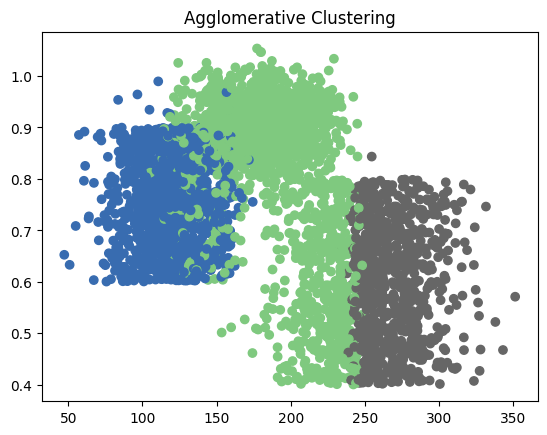

In [96]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=FA_train, cmap='Accent')
plt.title('Agglomerative Clustering')
plt.show()

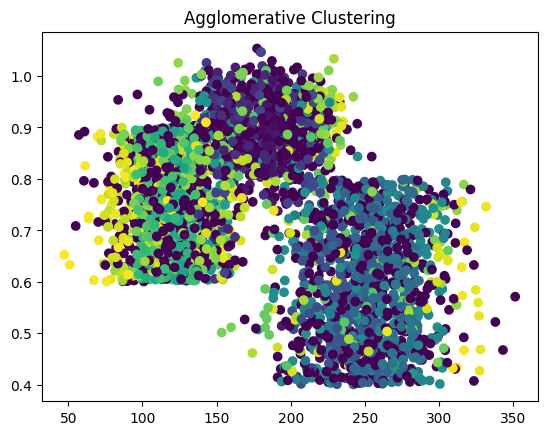

In [149]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=clust_label, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [155]:
# Clustering with kmeans 
bkm = BisectingKMeans(n_clusters=3, random_state=42)
bkm_train= bkm.fit_predict(X_train)
silhouette_bkm= silhouette_score(X_train, bkm_train)
print(f"Silhouette Score : {silhouette_bkm:.4f}")
db_index = davies_bouldin_score(X_train, bkm_train)
print(f'Davies-Bouldin Index: {db_index}')

Silhouette Score : 0.4014
Davies-Bouldin Index: 0.7865553682044899


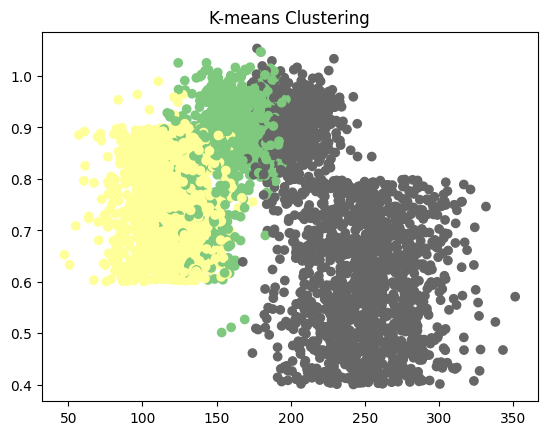

In [161]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=bkm_train, cmap='Accent_r')
plt.title('K-means Clustering')
plt.show()